# Working with MPAS Meshes

##  Mesh Definition

All components of MPAS lie on a C-grid staggered Voronoi Mesh as seen in the figure below:

<p align="center">
  <img src="../_static/examples/mpas/c-grid.png"
  width="400" / >
</p>

This type of mesh is represented through two different sub-meshes. The Primal Mesh represents the Voronoi Mesh and the Dual Mesh represents the Triangular Mesh.

*to-do: more in-depth description/overview of MPAS from the website and specification document.*




## Imports

In [2]:
import xarray as xr
import uxarray as ux

## Grid and Data Files

As mentioned in earlier notebooks, the grid definition and data variables are typically stored in separate files. However, in this example, our dataset will contain both within the same file, which is often the case when working with smaller datasets.



In [3]:
mpas_root_filepath = "../../test/meshfiles/mpas/"
mpas_dataset_filepath = mpas_root_filepath + "QU/mesh.QU.1920km.151026.nc"

In [4]:
mpas_xr_ds = xr.open_dataset(mpas_dataset_filepath)
mpas_xr_ds

<xarray.Dataset>
Dimensions:               (nCells: 162, nEdges: 480, nVertices: 320,
                           maxEdges: 6, maxEdges2: 12, TWO: 2, vertexDegree: 3)
Dimensions without coordinates: nCells, nEdges, nVertices, maxEdges, maxEdges2,
                                TWO, vertexDegree
Data variables: (12/42)
    latCell               (nCells) float64 ...
    lonCell               (nCells) float64 ...
    xCell                 (nCells) float64 ...
    yCell                 (nCells) float64 ...
    zCell                 (nCells) float64 ...
    indexToCellID         (nCells) int32 ...
    ...                    ...
    cellQuality           (nCells) float64 ...
    gridSpacing           (nCells) float64 ...
    triangleQuality       (nVertices) float64 ...
    triangleAngleQuality  (nVertices) float64 ...
    obtuseTriangle        (nVertices) int32 ...
    meshDensity           (nCells) float64 ...
Attributes:
    on_a_sphere:    YES
    sphere_radius:  1.0
    is_periodic:    NO
    history:        MpasMeshConverter.x base_grids/x1.162.grid.nc base_meshes...
    mesh_spec:      1.0
    Conventions:    MPAS
    source:         MpasMeshConverter.x
    file_id:        rku96q0z66

This dataset contains the full set of connectivity variables needed to describe an MPAS mesh, as described in the MPAS Specification Document [2]. It also contains data variables such as {VARIABLE} and , which lie on the Primal Mesh. Below is a list of connectivity variables and their geometric meaning, which will be further described when comparing to the UGRID encoding:


### Primal Mesh
* **lonVertex, latVertex**: Corner Vertices of Primal Mesh cells
* **lonCell, latCell**: Center Vertices of Primal Mesh cells
* **verticesOnCell**: Vertex indices that surround each Primal Mesh cell
* **verticesOnEdge**: Vertex indices that saddle a given edge
* **nEdgesOnCell**: Maximum number of edges that can surround a cell

### Dual Mesh
* **lonCell, latCell**: Corner Vertices of Dual Mesh cells
* **lonVertex, latVertex**: Center Vertices of Dual Mesh cells
* **cellsOnVertex**: Vertex indices that surround each Dual Mesh cell
* **cellsOnEdge**: Vertex indices that saddle a given edge


## Constructing a Grid Object

The `xarray.Dataset` that we opened above stores the coordinates and connectivity variables for both the Primal and Dual meshes together in a single dataset. With `uxarray`, we can create separate `Grid` objects for either the Primal or Dual meshes. The `uxarray.Grid` class parses our input dataset, detects that it is represented in the MPAS specifications, and encodes either the Primal or Dual mesh in the UGRID conventions.

In [5]:
primal_mesh = ux.Grid(mpas_xr_ds, use_dual=False)
dual_mesh = ux.Grid(mpas_xr_ds, use_dual=True)

C:\Users\Philip\.conda\envs\uxarray\lib\site-packages\uxarray\_mpas.py:248: UserWarning: Missing Required Attribute: 'mesh_id'
  warnings.warn("Missing Required Attribute: 'mesh_id'")


In [6]:
primal_mesh.ds

<xarray.Dataset>
Dimensions:               (nMesh2_node: 320, nMesh2_face: 162,
                           nMaxMesh2_face_nodes: 6, nMesh2_edge: 480, Two: 2)
Dimensions without coordinates: nMesh2_node, nMesh2_face, nMaxMesh2_face_nodes,
                                nMesh2_edge, Two
Data variables:
    Mesh2                 float64 nan
    Mesh2_node_x          (nMesh2_node) float64 178.2 175.1 ... 257.0 185.0
    Mesh2_node_y          (nMesh2_node) float64 34.19 23.25 ... -52.62 -52.62
    Mesh2_face_x          (nMesh2_face) float64 185.0 257.0 0.0 ... 172.4 197.7
    Mesh2_face_y          (nMesh2_face) float64 26.57 26.57 ... -46.91 -46.91
    Mesh2_face_nodes      (nMesh2_face, nMaxMesh2_face_nodes) int64 3 4 ... 217
    Mesh2_edge_nodes      (nMesh2_edge, Two) int64 319 211 229 ... 183 182 296
    Mesh2_face_dimension  (nMesh2_face) int64 5 5 5 5 5 5 5 5 ... 6 6 6 6 6 6 6
Attributes:
    sphere_radius:  1.0
    mesh_spec:      1.0
    on_a_sphere:    YES

In [7]:
dual_mesh.ds

<xarray.Dataset>
Dimensions:               (nMesh2_node: 162, nMesh2_face: 320, Three: 3,
                           nMesh2_edge: 480, Two: 2)
Dimensions without coordinates: nMesh2_node, nMesh2_face, Three, nMesh2_edge,
                                Two
Data variables:
    Mesh2                 float64 nan
    Mesh2_node_x          (nMesh2_node) float64 185.0 257.0 0.0 ... 172.4 197.7
    Mesh2_node_y          (nMesh2_node) float64 26.57 26.57 ... -46.91 -46.91
    Mesh2_face_x          (nMesh2_face) float64 178.2 175.1 ... 257.0 185.0
    Mesh2_face_y          (nMesh2_face) float64 34.19 23.25 ... -52.62 -52.62
    Mesh2_face_nodes      (nMesh2_face, Three) int64 46 42 0 42 ... 159 161 160
    Mesh2_edge_nodes      (nMesh2_edge, Two) int64 159 160 156 ... 155 97 154
    Mesh2_face_dimension  (nMesh2_face) int64 3 3 3 3 3 3 3 3 ... 3 3 3 3 3 3 3
Attributes:
    sphere_radius:  1.0
    mesh_spec:      1.0
    on_a_sphere:    YES

## Relationship between MPAS and UGRID
*to-do: describe MPAS to UGRID encoding, differences in fill values, standardized datatypes, and how geometric connectivity variables relate between these two conventions*

*create a table to showcase the mapping between MPAS and UGRID*

## Functionality

### Face Area

In [8]:
primal_mesh_total_area = primal_mesh.calculate_total_face_area()
primal_mesh_total_area

12.5663761450242

In [9]:
primal_mesh_face_areas = primal_mesh.face_areas
primal_mesh_face_areas.sum()

12.5663761450242

In [10]:
dual_mesh_total_area = dual_mesh.calculate_total_face_area()
dual_mesh_total_area

12.566372994960695

In [11]:
dual_mesh_face_areas = dual_mesh.face_areas
primal_mesh_face_areas.sum()

12.5663761450242

### Integration

In [12]:
# to-do, need to fix function before adding

## Visualization

*very messy, waiting on other PR's to get merged before doing primal mesh*

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

from uxarray.constants import INT_FILL_VALUE, INT_DTYPE

### Helper Functions

In [14]:
def close_face_nodes(Grid):
    """Closes (``Mesh2_face_nodes``) by inserting the first node index after
    the last non-fill-value node.
    Parameters
    ----------
    """
    # padding to shape [nMesh2_face, nMaxMesh2_face_nodes + 1]
    closed = np.ones((Grid.nMesh2_face, Grid.nMaxMesh2_face_nodes + 1),
                     dtype=INT_DTYPE) * INT_FILL_VALUE

    # set all non-paded values to original face nodee values
    closed[:, :-1] = Grid.Mesh2_face_nodes.copy()

    # instance of first fill value
    first_fv_idx_2d = np.argmax(closed == INT_FILL_VALUE, axis=1)

    # 2d to 1d index for np.put()
    first_fv_idx_1d = first_fv_idx_2d + ((Grid.nMaxMesh2_face_nodes + 1) * np.arange(0, Grid.nMesh2_face))

    # column of first node values
    first_node_value = Grid.Mesh2_face_nodes[:, 0].copy()

    # insert first node column at occurrence of first fill value
    np.put(closed.ravel(), first_fv_idx_1d, first_node_value)

    return closed

def get_verts(Grid):
    closed_face_nodes = close_face_nodes(Grid)
    face_dimension = Grid.Mesh2_face_dimension.values
    x = Grid.Mesh2_node_x.values
    y = Grid.Mesh2_node_y.values

    verts = []
    for face_node, face_dim in zip(closed_face_nodes, face_dimension):
        polygon_x = x[face_node[0:face_dim]]
        polygon_y = y[face_node[0:face_dim]]

        if np.any(np.abs(polygon_x - 180) > 170):
            continue

        vert = np.array([polygon_x, polygon_y])
        verts.append(vert.T)

    return verts


### Primal Mesh

Text(0.5, 1.0, 'Primal Mesh')

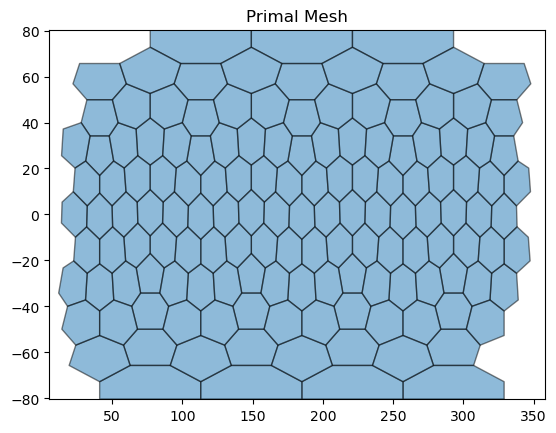

In [26]:
x = primal_mesh.Mesh2_node_x.values
y = primal_mesh.Mesh2_node_y

primal_vertices = get_verts(primal_mesh)

primal_polygons = PolyCollection(primal_vertices, edgecolors='Black', alpha=0.5)

fig, ax = plt.subplots()

ax.add_collection(primal_polygons, autolim=False)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_title("Primal Mesh")

### Dual Mesh

Text(0.5, 1.0, 'Dual Mesh')

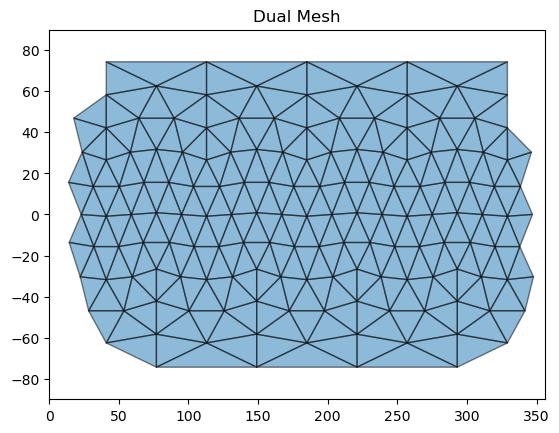

In [25]:
x = dual_mesh.Mesh2_node_x.values
y = dual_mesh.Mesh2_node_y

dual_vertices = get_verts(dual_mesh)

dual_polygons = PolyCollection(dual_vertices, edgecolors='Black', alpha=0.5)

fig, ax = plt.subplots()

ax.add_collection(dual_polygons, autolim=False)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_title("Dual Mesh")

## Primal and Dual

Text(0.5, 1.0, 'Dual & Primal Mesh')

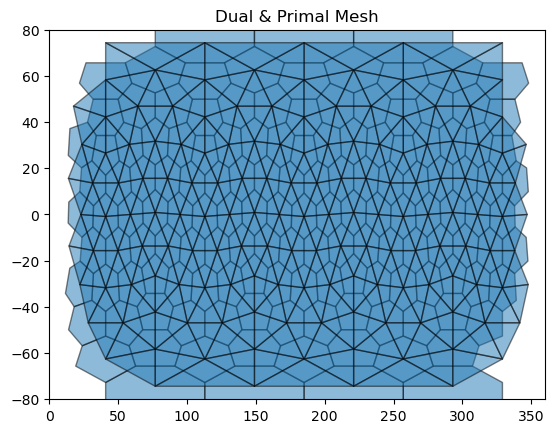

In [31]:
fig, ax = plt.subplots()

# combined_vertices = primal_vertices + dual_vertices
# combined_polygons = PolyCollection(combined_vertices, edgecolors='Black', alpha=0.5)

dual_vertices = get_verts(dual_mesh)
dual_polygons = PolyCollection(dual_vertices, edgecolors='Black', alpha=0.5)
primal_vertices = get_verts(primal_mesh)
primal_polygons = PolyCollection(primal_vertices, edgecolors='Black', alpha=0.5)

ax.add_collection(primal_polygons, autolim=False)
ax.add_collection(dual_polygons, autolim=False)
ax.set_xlim(0, 360)
ax.set_ylim(-80, 80)
ax.set_title("Dual & Primal Mesh")

## References

[1] https://mpas-dev.github.io/

[2] https://mpas-dev.github.io/files/documents/MPAS-MeshSpec.pdf

[3] http://ugrid-conventions.github.io/ugrid-conventions/

In [ ]:
print(f"x datatype {x.dtype} must be floating point")